## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

In [2]:
rawData = pd.read_csv("USA_Housing.csv")

In [3]:
rawData.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#identify numerica data
numeric_data = ["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population","Price"]

## Exploratory Analysis

### Check distribution

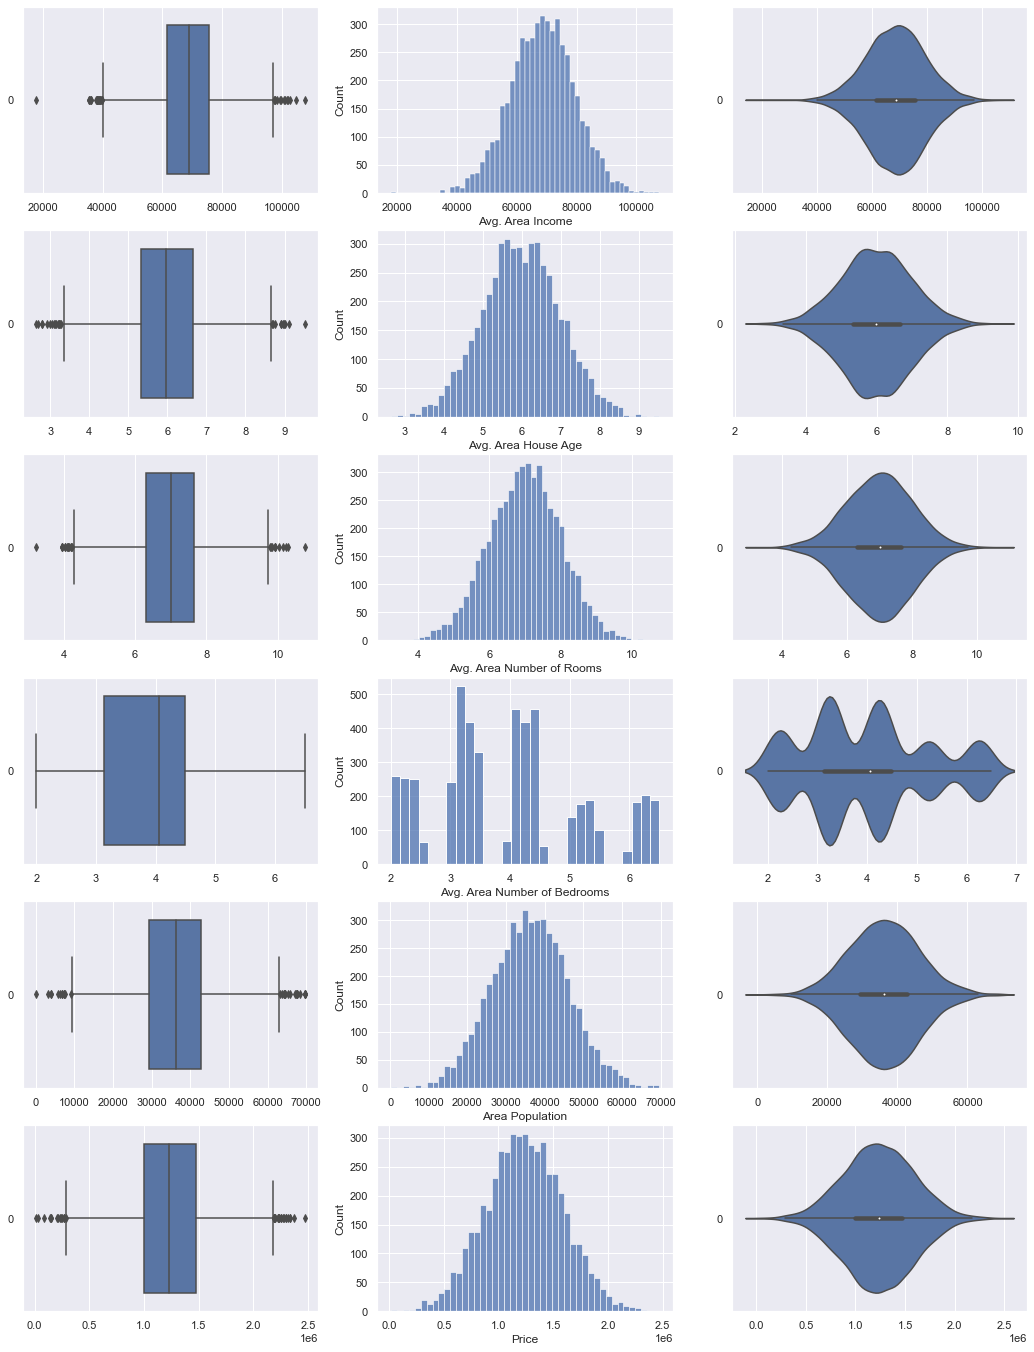

In [6]:
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = rawData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = rawData[var], ax = axes[count,1])
    sb.violinplot(data = rawData[var], orient = "h", ax = axes[count,2])
    count += 1

### Check correlation between features

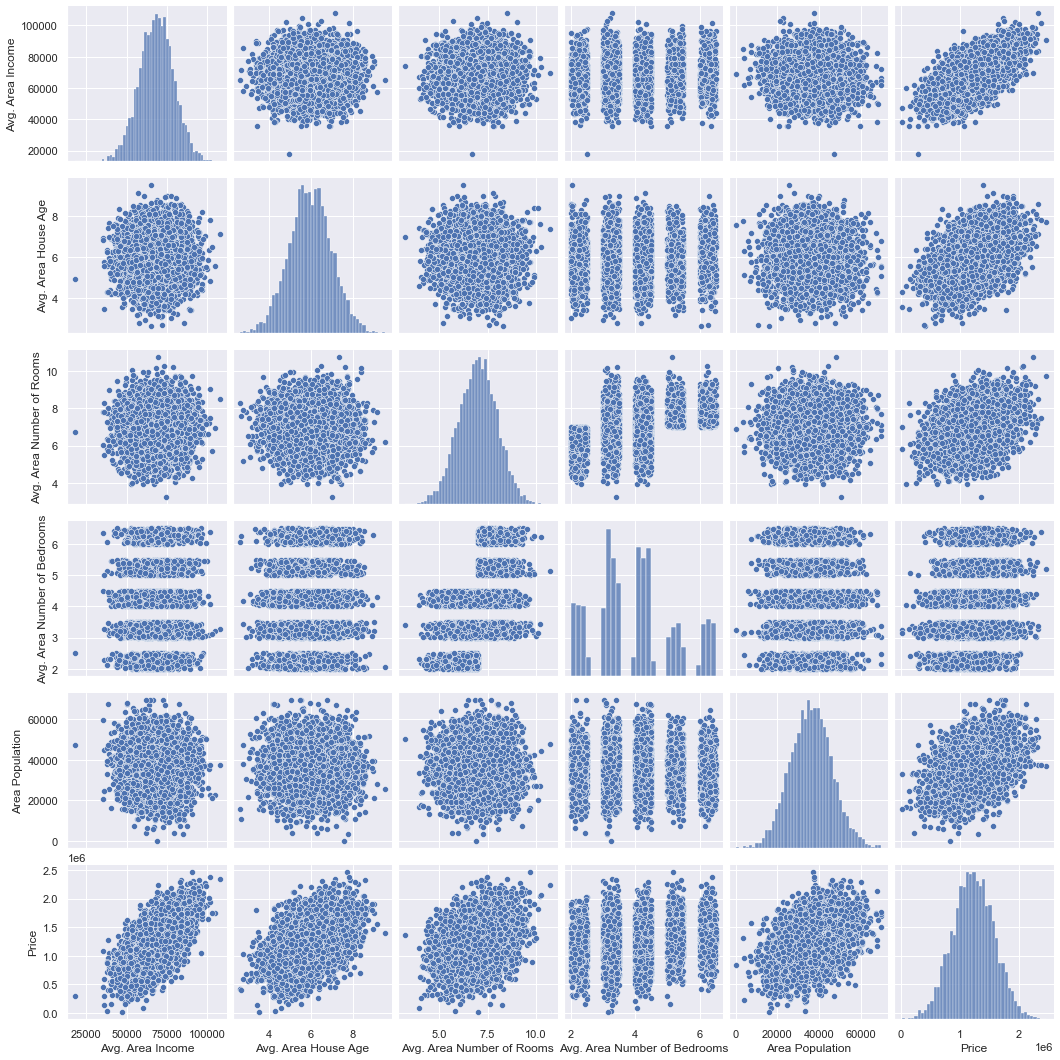

In [7]:
sb.pairplot(rawData[numeric_data])

<AxesSubplot:>

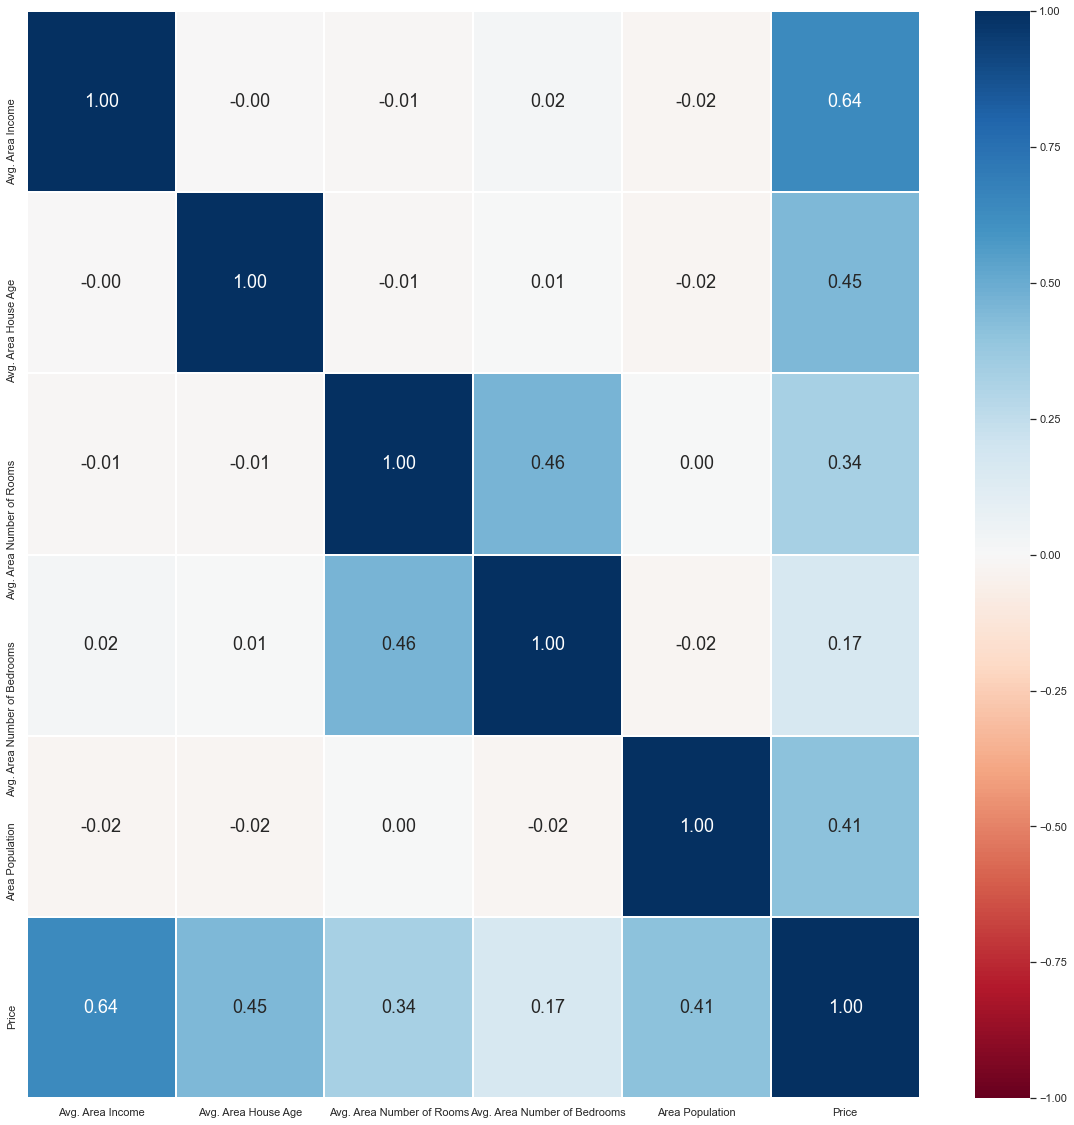

In [8]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(rawData[numeric_data].corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

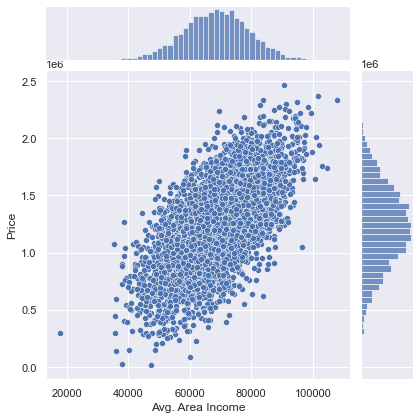

In [9]:
sb.jointplot(data = rawData,x="Avg. Area Income",y="Price")

## Applying Regression Models
Take note use random_state = 1 for train test split to ensure consistency

## Univariate Linear Regression

In [10]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

In [11]:
x = pd.DataFrame(rawData["Avg. Area Income"])
y = pd.DataFrame(rawData["Price"])

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 1)

In [12]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train,y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [-192632.35519278]
Coefficients of Regression 	: a =  [[20.79670833]]


In [13]:
# Predict y based on x
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

In [14]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39917301283238515
Mean Squared Error (MSE) 	: 73351593115.49103

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4363425730861219
Mean Squared Error (MSE) 	: 74611437056.01845



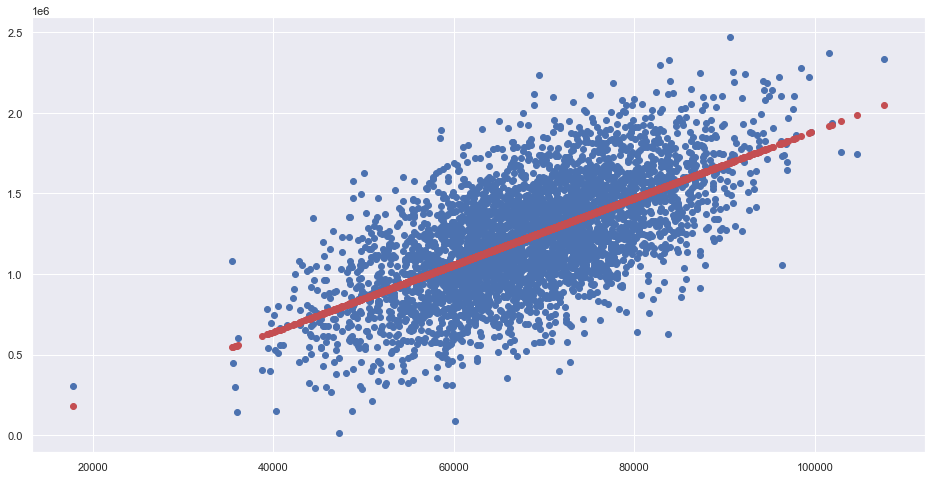

In [15]:
# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_train_pred, color = "r")
plt.show()

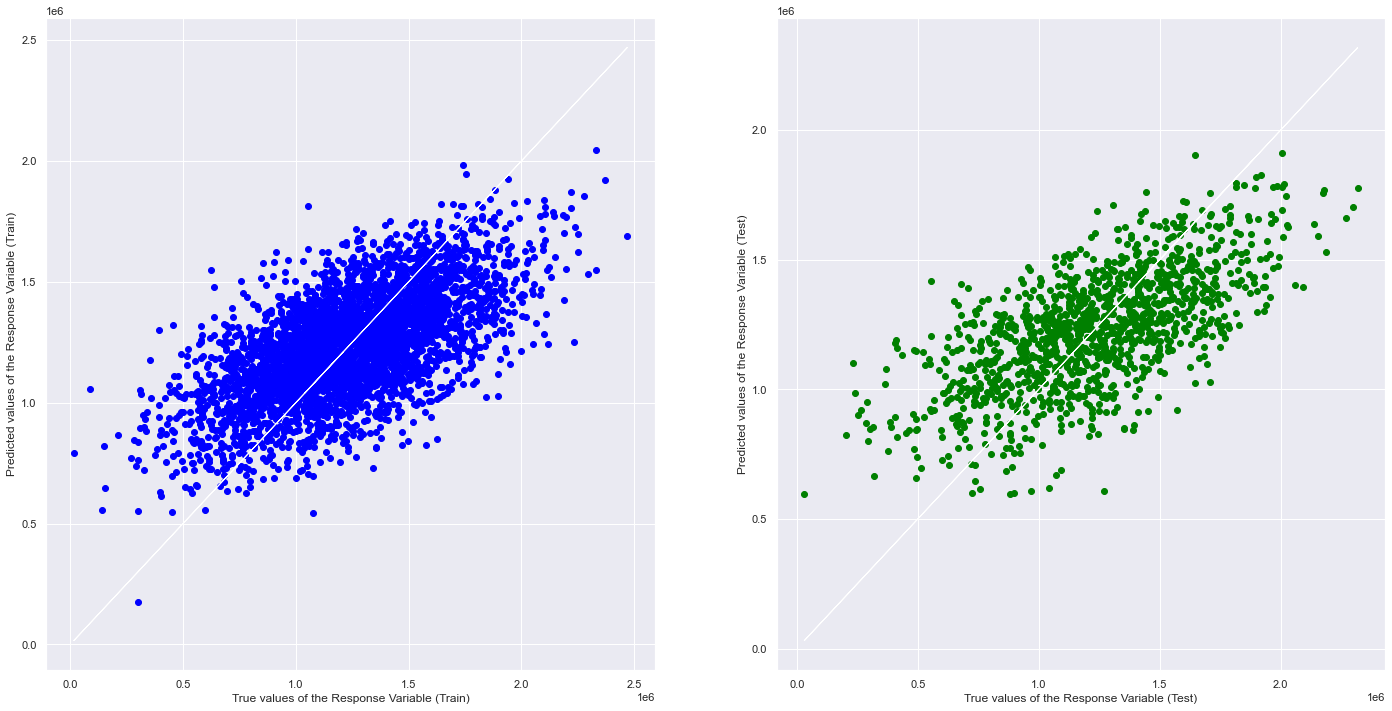

In [16]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Multivariate Linear Regression

In [17]:
x = pd.DataFrame(rawData[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]])
y = pd.DataFrame(rawData["Price"])

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 1)

In [18]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(x_train,y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [-2634496.57800377]
Coefficients of Regression 	: a =  [[2.16128400e+01 1.65199115e+05 1.20215153e+05 2.37446107e+03
  1.51476862e+01]]


In [19]:
# Predict y based on x
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

In [20]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9173514544550543
Mean Squared Error (MSE) 	: 10090096839.656004

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9198127436987775
Mean Squared Error (MSE) 	: 10614401834.409979



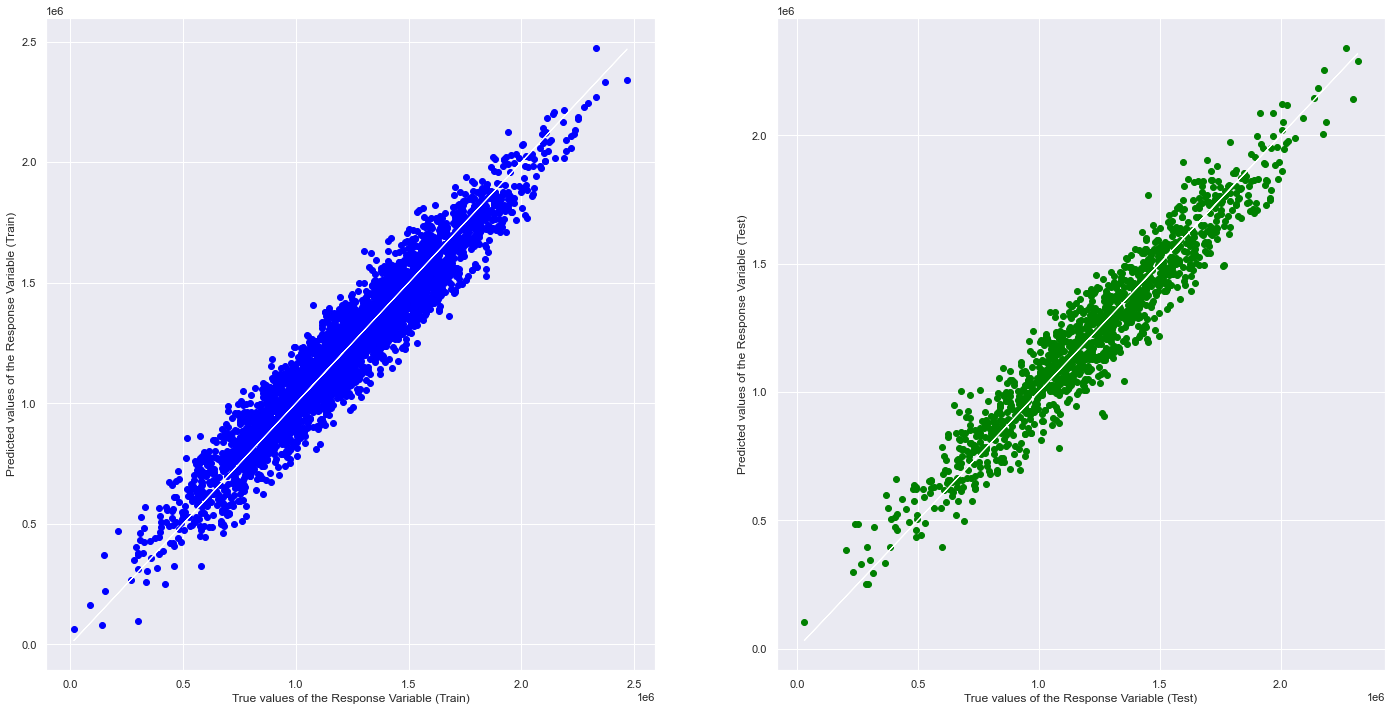

In [21]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Univariate Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
x = pd.DataFrame(rawData["Avg. Area Income"])
y = pd.DataFrame(rawData["Price"])

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 1)

In [24]:
# Linear Regression using Train Data
treereg = DecisionTreeRegressor()         # create the linear regression object
treereg.fit(x_train,y_train)        # train the linear regression model

DecisionTreeRegressor()

In [25]:
y_train_pred = treereg.predict(x_train)
y_test_pred = treereg.predict(x_test)

In [26]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", treereg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", treereg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.2142241878843545
Mean Squared Error (MSE) 	: 160727078612.71692



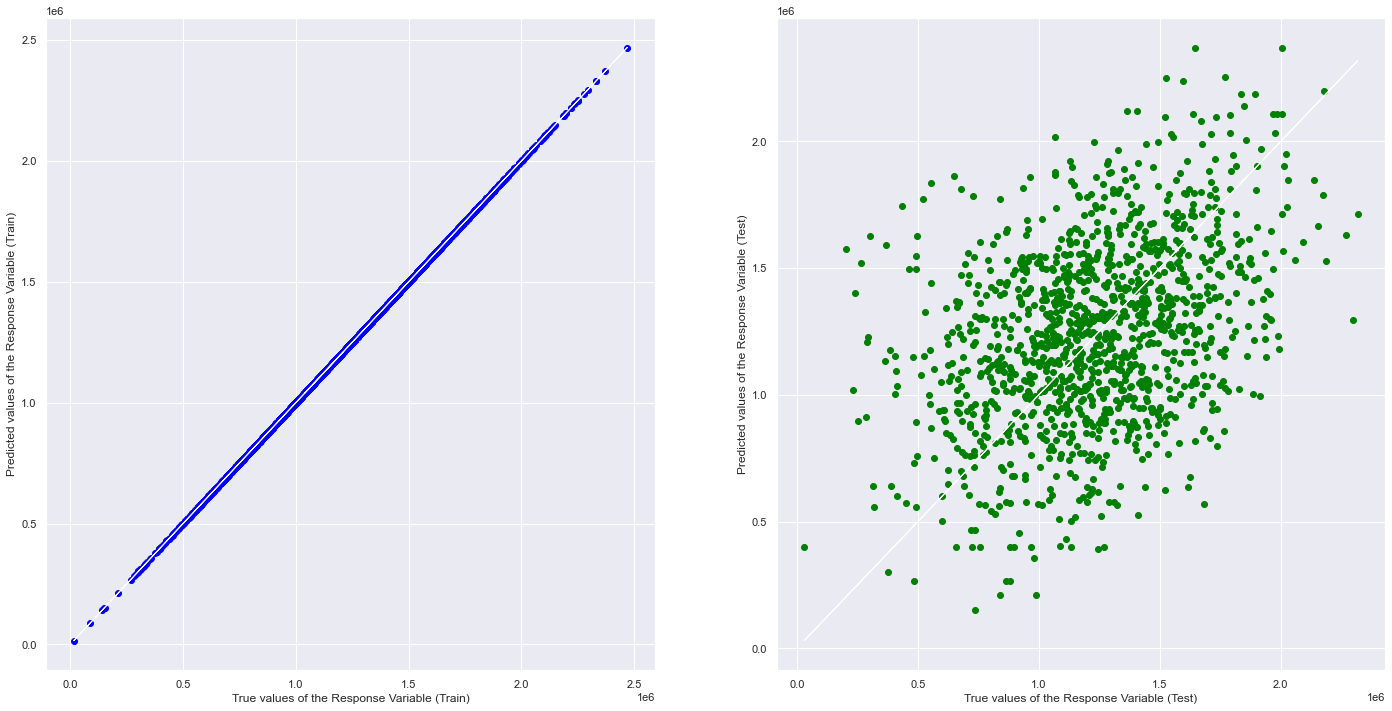

In [27]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Multivariate Decision Tree Regressor

In [28]:
x = pd.DataFrame(rawData[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]])
y = pd.DataFrame(rawData["Price"])

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 1)

In [29]:
# Linear Regression using Train Data
treereg = DecisionTreeRegressor()         # create the linear regression object
treereg.fit(x_train,y_train)        # train the linear regression model

DecisionTreeRegressor()

In [30]:
y_train_pred = treereg.predict(x_train)
y_test_pred = treereg.predict(x_test)

In [31]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", treereg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", treereg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7746925962534972
Mean Squared Error (MSE) 	: 29823982387.542694



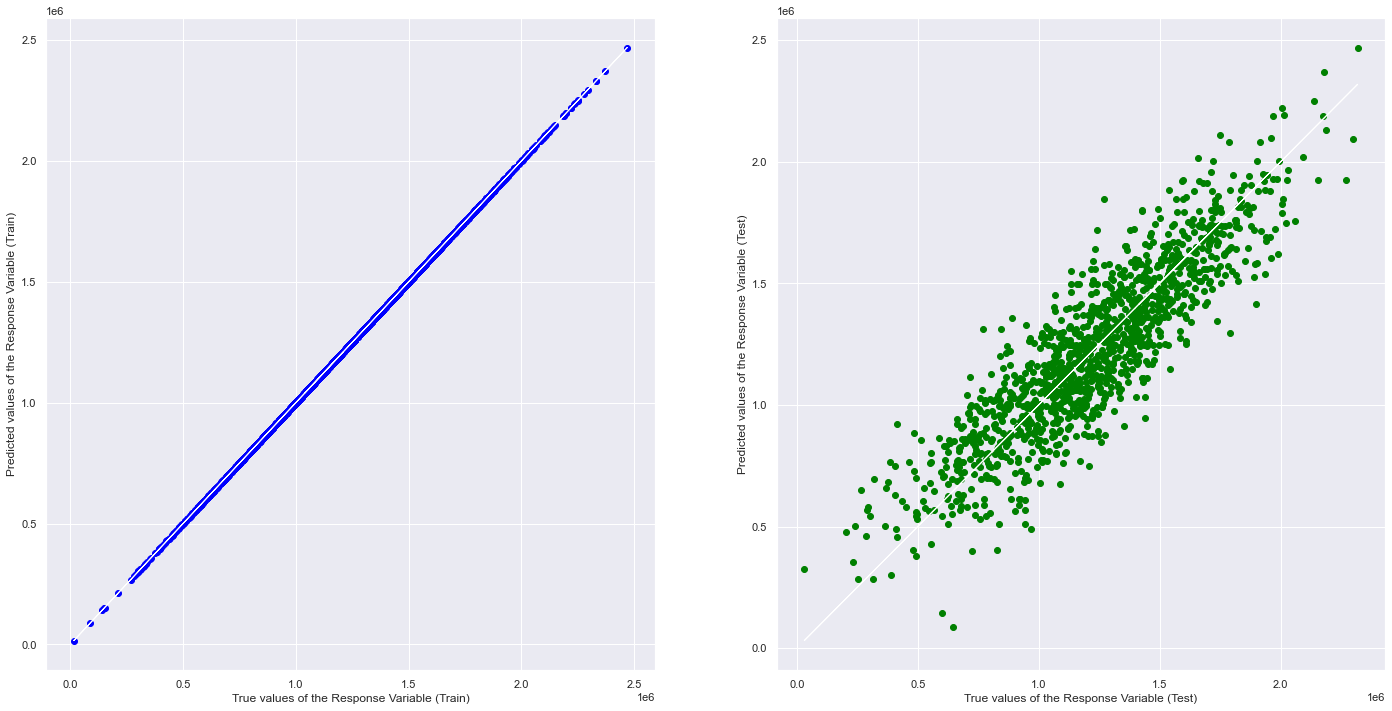

In [32]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Multivariate Random Forest Regressor

In [33]:
# Import LinearRegression model from Scikit-Learn
from sklearn.ensemble import RandomForestRegressor

In [34]:
x = pd.DataFrame(rawData[["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]])
y = pd.DataFrame(rawData["Price"])

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 1)

In [35]:
# Linear Regression using Train Data
forreg = RandomForestRegressor()         # create the linear regression object
forreg.fit(x_train,y_train)        # train the linear regression model

<ipython-input-35-230192183da7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forreg.fit(x_train,y_train)        # train the linear regression model


RandomForestRegressor()

In [36]:
y_train_pred = forreg.predict(x_train)
y_test_pred = forreg.predict(x_test)

In [37]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", forreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", forreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9836946035720701
Mean Squared Error (MSE) 	: 1990634292.255312

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8904951262672124
Mean Squared Error (MSE) 	: 14495180234.872488



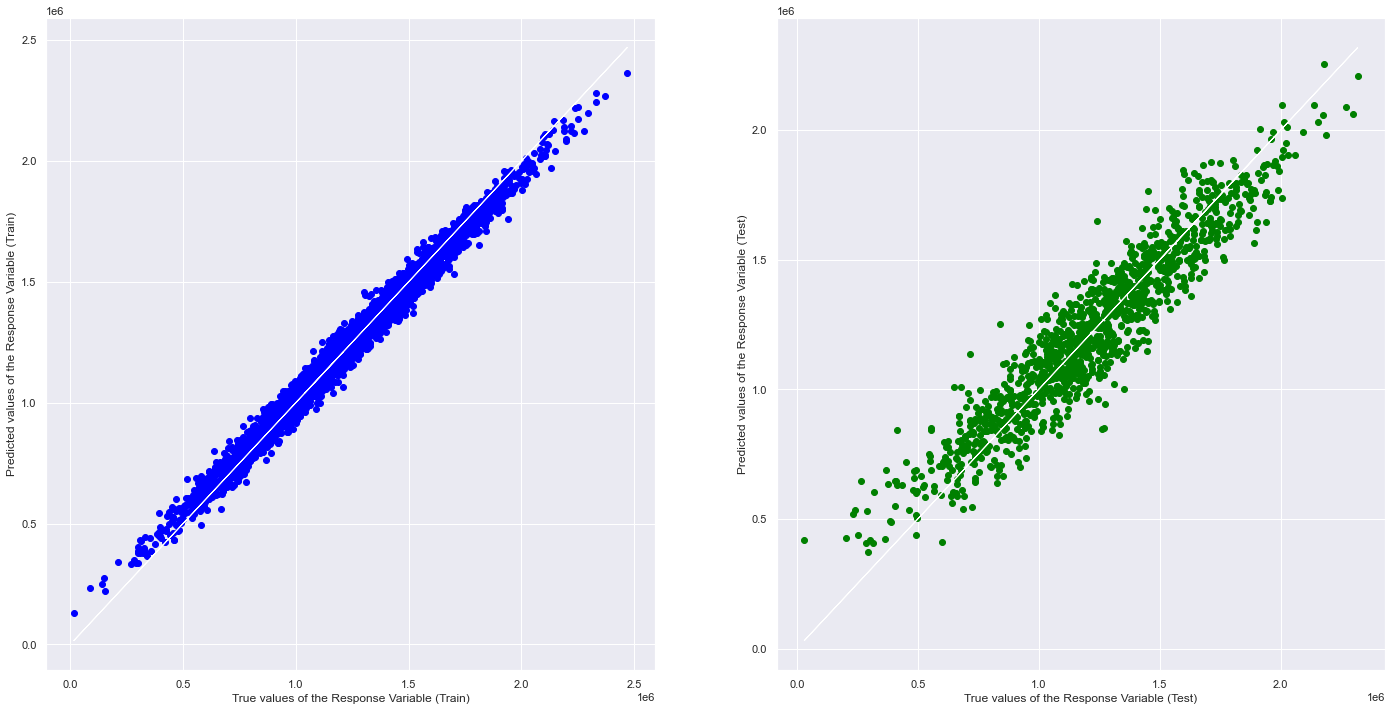

In [38]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Results

In the end, observed that multivariate linear regression yielded lowest variance and MSE